In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import natsort as ns

In [2]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [3]:
db = sqlite3.connect('../data/hop_teaming.sqlite')

In [4]:
tables = db.execute("SELECT name FROM sqlite_master WHERE type='table';")
for table in tables:
    print(table[0])

cbsa
specialty
referrals
nashville_referrals
nppes
communities_pats
communities
nash_vegas


In [5]:
col = db.execute("PRAGMA table_info(communities)").fetchall()
print([e[1] for e in col])

['npi', 'communityId']


In [6]:
#col = db.execute("PRAGMA table_info(specialty)").fetchall()
#print([e[1] for e in col])

In [7]:
vandy_npi_nums = [1306889597, 1396882205, 1558408633]

In [8]:
#Selects only the 3 Vanderbilt acute care centers

query = '''
SELECT *
FROM nash_vegas
'''

qtemp = pd.read_sql(query, db)

In [9]:
query1 = '''
SELECT nv.to_npi, 
    cp.communityId, 
    nv.from_npi_specialty, 
    nppes.provider_organization_name, 
    nppes.provider_first_name, 
    nppes.provider_last_name  
FROM nash_vegas AS nv
LEFT JOIN communities_pats AS cp
ON nv.from_npi = cp.npi
LEFT JOIN nppes
ON nv.from_npi = nppes.npi
WHERE nv.to_npi = 1306889597 OR nv.to_npi = 1396882205 OR nv.to_npi = 1558408633;
'''

vandy_npi = pd.read_sql(query1, db)

In [10]:
vandy_npi.sort_values('communityId')

,to_npi,communityId,from_npi_specialty,provider_organization_name,provider_first_name,provider_last_name
683,1396882205,7,Urology,None,DOUGLAS,ALTENBERN
2151,1396882205,7,Urology,None,WHITSON,LOWE
916,1396882205,7,Family Medicine,None,HAL,JENKINS
910,1396882205,7,Nurse Practitioner,None,JACOB,PAGE
905,1396882205,7,Urology,None,GREGORY,STEWART
...,...,...,...,...,...,...
466,1396882205,6808,Ophthalmology,None,JOSHUA,YOUNG
196,1396882205,6808,Ophthalmology,None,PETER,SONKIN
2089,1396882205,6808,Physical Medicine & Rehabilitation,None,SON,LE
442,1396882205,6808,Ophthalmology,None,CARL,AWH


In [11]:
vandy_npi

,to_npi,communityId,from_npi_specialty,provider_organization_name,provider_first_name,provider_last_name
0,1306889597,1176,Nurse Practitioner,None,HEATHER,LAMBERT
1,1306889597,6752,General Practice,None,THOMAS,KOWAL
2,1306889597,6752,Radiology,None,JONATHAN,GORDON
3,1306889597,6752,Internal Medicine,None,ALPESH,PATEL
4,1306889597,6752,Psychiatry & Neurology,None,WIAAM,FALOUJI
...,...,...,...,...,...,...
2185,1396882205,1410,Nurse Practitioner,None,SHELTON,HARRELL
2186,1396882205,1410,Internal Medicine,None,MICHAEL,NOTO
2187,1396882205,1410,Surgery,None,JILL,STREAMS
2188,1396882205,1410,Physical Medicine & Rehabilitation,None,MARNI,HILLINGER


In [12]:
#Full communities dataset

query2 = '''
SELECT cp.npi, 
        cp.communityId, 
        s.classification, 
        n.entity_type_code, 
        n.provider_organization_name,
        n.provider_last_name,
        n.provider_first_name
FROM communities AS cp
LEFT JOIN specialty AS s
ON cp.npi = s.npi
LEFT JOIN nppes AS n
ON cp.npi = n.npi
'''

communities_full = pd.read_sql(query2, db)

In [13]:
#communities_full

#Answers the question whether or not an npi could be duplicated and included in multiple communities

communities_full.nunique()

npi                           4250
communityId                     10
Classification                  49
entity_type_code                 2
provider_organization_name      16
provider_last_name            2987
provider_first_name           1401
dtype: int64

In [14]:
communities_count = communities_full.groupby('communityId')['npi'].count()

In [15]:
communities_count = communities_count.reset_index()

In [16]:
communities_count = communities_count.rename(columns = {'npi' : 'count'})

In [17]:
communities_count['communityId'] = communities_count['communityId'].astype(str)

In [18]:
communities_count = communities_count.sort_values('count', ascending = False)
communities_count.head(10)

,communityId,count
7,4244,1387
3,4234,898
6,4239,604
8,4245,378
1,2802,284
2,4226,247
5,4238,184
9,4247,125
4,4236,103
0,2542,40


In [19]:
communities_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 7 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   communityId  10 non-null     object
 1   count        10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [20]:
communities_full[communities_full['npi'] == vandy_npi_nums[0]]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
1335,1306889597,4247,General Acute Care Hospital,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None


In [21]:
communities_full[communities_full['npi'] == vandy_npi_nums[1]]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
1730,1396882205,4244,General Acute Care Hospital,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None


In [22]:
communities_full[communities_full['npi'] == vandy_npi_nums[2]]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
2392,1558408633,4244,General Acute Care Hospital,2.0,VANDERBILT UNIVERSITY MEDICAL CENTER,None,None


<ipython-input-23-51c2a3facc82>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('communityId_to_referral_count.png', pdi = 250)


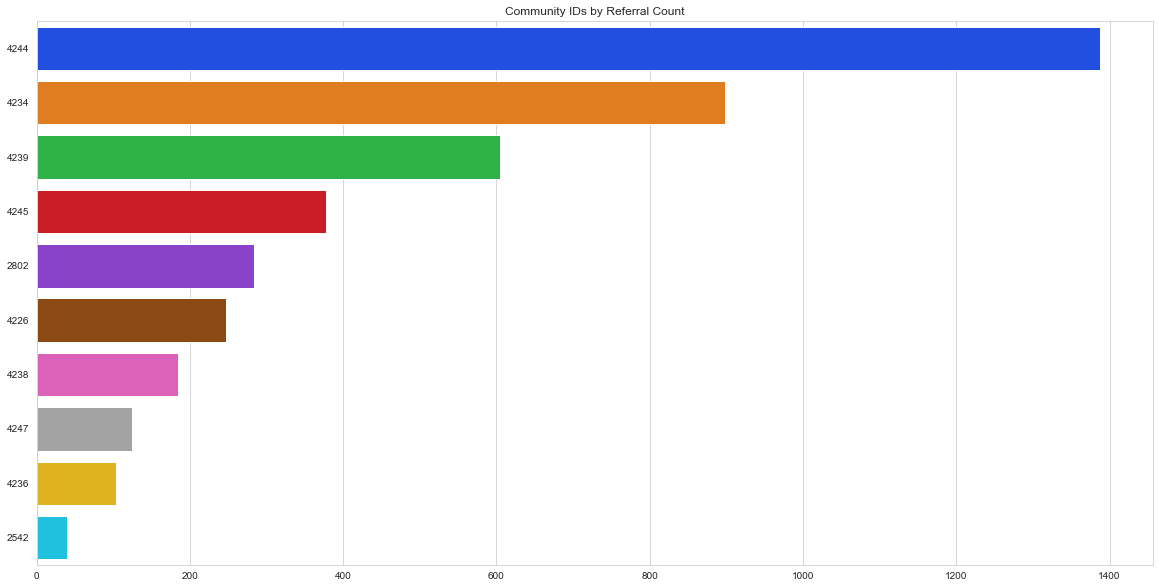

In [23]:
sns.set_style('whitegrid')
sns.set_palette('bright')

fig, (ax0) = plt.subplots(1, figsize = (20, 10))

g0 = sns.barplot(y = 'communityId', x = 'count', ax = ax0,
                 data = communities_count.sort_values('count', ascending = False)
                 )

ax0.set_title('Community IDs by Referral Count')
ax0.set(xlabel = '', ylabel = '')

fig.savefig('communityId_to_referral_count.png', pdi = 250)

In [24]:
communities_4244 = communities_full[communities_full['communityId'] == 4244]
communities_4247 = communities_full[communities_full['communityId'] == 4247]
communities_vandy = communities_full[(communities_full['communityId'] == 4244) | (communities_full['communityId'] == 4247)]
communities_nVandy = communities_full[communities_full['communityId'] != 4244]
communities_nVandy = communities_nVandy[communities_nVandy['communityId'] != 4247]

In [25]:
communities_nVandy[communities_nVandy['entity_type_code'] == 2.0]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
92,1023055126,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None
691,1164590386,2802,General Acute Care Hospital,2.0,SAINT THOMAS RUTHERFORD HOSPITAL,None,None
1128,1265445506,4238,General Acute Care Hospital,2.0,WILLIAMSON COUNTY HOSPITAL DISTRICT,None,None
1137,1265487193,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None
1289,1295780476,4234,General Acute Care Hospital,2.0,HTI MEMORIAL HOSPITAL CORPORATION,None,None
1816,1417938846,4245,General Acute Care Hospital,2.0,"MACON COUNTY GENERAL HOSPITAL, INC.",None,None
1958,1447571658,4245,General Acute Care Hospital,2.0,SUMNER REGIONAL MEDICAL CENTER LLC,None,None
1962,1447639398,2802,General Acute Care Hospital,2.0,"SAINT THOMAS STONES RIVER HOSPITAL, LLC",None,None
2048,1467763458,4245,General Acute Care Hospital,2.0,TROUSDALE MEDICAL CENTER LLC,None,None
2298,1538114434,4245,General Acute Care Hospital,2.0,HENDERSONVILLE HOSPITAL CORPORATION,None,None


In [26]:
communities_nVandy

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name
0,1003013947,4234,Orthopaedic Surgery,1.0,None,OTTO,ROBERT
2,1003031261,4234,Orthopaedic Surgery,1.0,None,RUBRIGHT,JAMES
5,1003071333,2542,Family Medicine,1.0,None,NATHAN,JAYASHREE
6,1003075862,2802,Family Medicine,1.0,None,ANDERSON,AKASHIA
8,1003090424,4234,Thoracic Surgery (Cardiothoracic Vascular Surg...,1.0,None,BAXTER,TAMMY
...,...,...,...,...,...,...,...
4244,1992956114,4245,Physician Assistant,1.0,None,PERRY,AMANDA
4245,1992960298,4239,Radiology,1.0,None,STARACE,GABRIEL
4246,1992961841,4238,Nurse Practitioner,1.0,None,ANGLUM,ABIGAIL
4247,1992978845,4234,Family Medicine,1.0,None,CHILDS,ADAM


In [27]:
communities_4244_count = communities_4244.groupby('Classification')['npi'].count()
communities_4247_count = communities_4247.groupby('Classification')['npi'].count()
communities_vandy_count = communities_vandy.groupby('Classification')['npi'].count()
communities_nVandy_count = communities_nVandy.groupby('Classification')['npi'].count()

In [28]:
#communities_1410_count = communities_1410_count.reset_index()

communities_vandy.info()

#communities_vandy

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 1 to 4249
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   npi                         1512 non-null   int64  
 1   communityId                 1512 non-null   int64  
 2   Classification              1512 non-null   object 
 3   entity_type_code            1512 non-null   float64
 4   provider_organization_name  5 non-null      object 
 5   provider_last_name          1507 non-null   object 
 6   provider_first_name         1507 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 94.5+ KB


In [29]:
communities_vandy_count.sort_values(ascending = False)

Classification
Internal Medicine                                     340
Nurse Practitioner                                    280
Nurse Anesthetist, Certified Registered               102
Anesthesiology                                        100
Radiology                                              85
Psychiatry & Neurology                                 84
Emergency Medicine                                     61
Surgery                                                45
Family Medicine                                        43
Pathology                                              41
Ophthalmology                                          35
Otolaryngology                                         29
Dermatology                                            28
Orthopaedic Surgery                                    27
Hospitalist                                            26
Physician Assistant                                    24
Obstetrics & Gynecology                                17

In [30]:
#communities_4247_count.sort_values(ascending = False).head(20)


In [31]:
communities_nVandy_count.sort_values(ascending = False)

Classification
Internal Medicine                                                 690
Nurse Practitioner                                                331
Nurse Anesthetist, Certified Registered                           269
Family Medicine                                                   202
Radiology                                                         143
Emergency Medicine                                                137
Physician Assistant                                               124
Anesthesiology                                                    121
Orthopaedic Surgery                                               110
Surgery                                                           100
Psychiatry & Neurology                                             70
Specialist                                                         55
Obstetrics & Gynecology                                            44
Urology                                                            39
Hospi

In [32]:
communities_vandy_count = communities_vandy_count.to_frame()
communities_nVandy_count = communities_nVandy_count.to_frame()

In [33]:
communities_vandy_count = communities_vandy_count.rename(columns = {'npi' : 'vcount'})
communities_nVandy_count = communities_nVandy_count.rename(columns = {'npi' : 'nVcount'})

In [34]:
communities_nVandy_count

,nVcount
Classification,
Allergy & Immunology,6
Anesthesiologist Assistant,1
Anesthesiology,121
Chiropractor,7
Clinical Neuropsychologist,1
Clinical Nurse Specialist,5
Colon & Rectal Surgery,4
Counselor,2
Dermatology,2


In [35]:
communities_compare_count = communities_vandy_count.merge(communities_nVandy_count, how = 'outer', on = 'Classification')

In [36]:
communities_compare_count = communities_compare_count.fillna({'vcount' : 0, 'nVcount' : 0})

In [37]:
communities_compare_count = communities_compare_count.astype({'vcount' : 'int', 'nVcount' : 'int'})

In [38]:
communities_compare_count = communities_compare_count.reset_index()
communities_compare_count['Classification'] = communities_compare_count['Classification'].astype(str)

In [39]:
communities_compare_count.sum(axis = 0)

Classification    Allergy & ImmunologyAnesthesiologyAudiologistC...
vcount                                                         1512
nVcount                                                        2732
dtype: object

In [40]:
communities_compare_count['sum_class'] = communities_compare_count['vcount'] + communities_compare_count['nVcount']
communities_compare_count['perc_class_vandy'] = communities_compare_count['vcount'] / communities_compare_count['sum_class']
communities_compare_count['perc_tot_refs'] = communities_compare_count['sum_class'] / 4244
#communities_compare_count['sum_tot'] = 

In [41]:
#Only select specialty classifications that are 1% or greater of the total number of referrals

communities_compare_count = communities_compare_count[communities_compare_count['perc_tot_refs'] >= 0.01]

In [42]:
communities_compare_count

,Classification,vcount,nVcount,sum_class,perc_class_vandy,perc_tot_refs
1,Anesthesiology,100,121,221,0.452489,0.052074
9,Emergency Medicine,61,137,198,0.308081,0.046654
10,Family Medicine,43,202,245,0.175510,0.057729
13,Hospitalist,26,39,65,0.400000,0.015316
14,Internal Medicine,340,690,1030,0.330097,0.242696
17,"Nurse Anesthetist, Certified Registered",102,269,371,0.274933,0.087418
18,Nurse Practitioner,280,331,611,0.458265,0.143968
19,Obstetrics & Gynecology,17,44,61,0.278689,0.014373
20,Ophthalmology,35,18,53,0.660377,0.012488
23,Orthopaedic Surgery,27,110,137,0.197080,0.032281


<ipython-input-43-3b2d965db249>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('vandy_and_market_perc_referrals.png', pdi = 250)


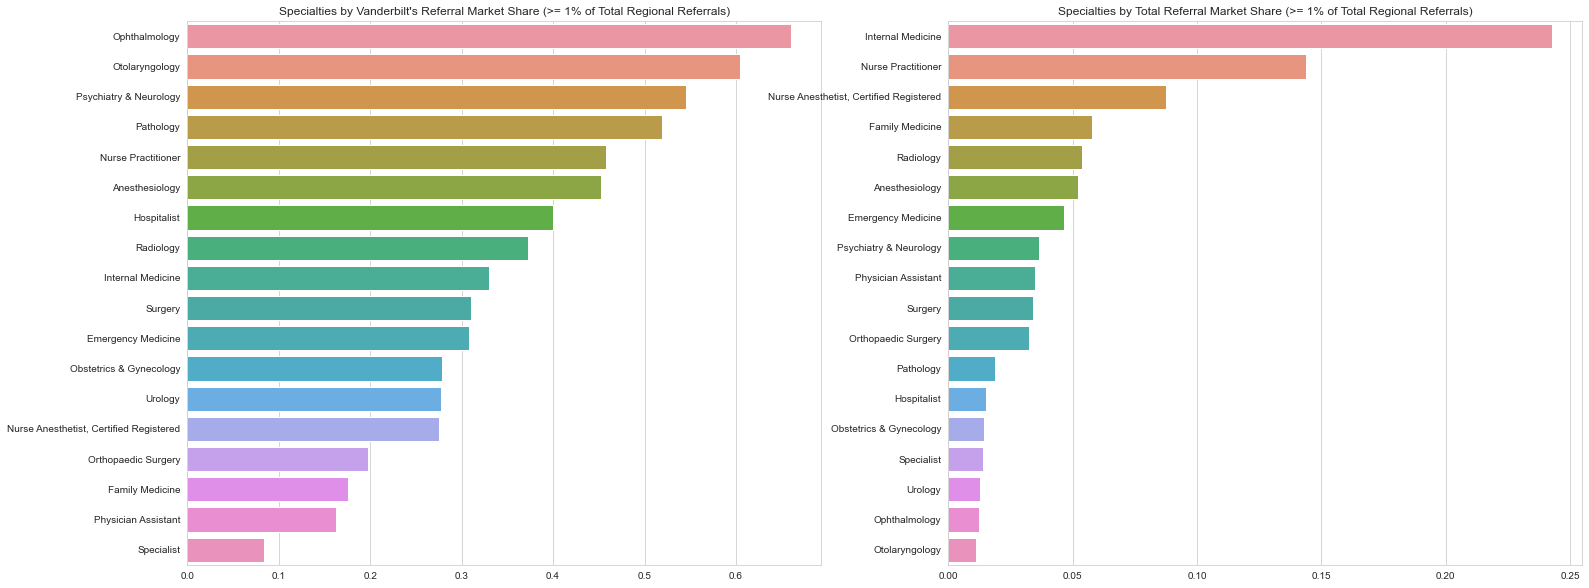

In [43]:
sns.set_style('whitegrid')
sns.set_palette('bright')

fig, (ax0, ax1) = plt.subplots(1,2, figsize = (25, 10))

g0 = sns.barplot(y = 'Classification', x = 'perc_class_vandy', ax = ax0,
                data = communities_compare_count.sort_values('perc_class_vandy', ascending = False)
                )

g1 = sns.barplot(y = 'Classification', x = 'perc_tot_refs', ax = ax1, 
                data = communities_compare_count.sort_values('perc_tot_refs', ascending = False)
                )

ax0.set_title("Specialties by Vanderbilt's Referral Market Share (>= 1% of Total Regional Referrals)")
ax0.set(xlabel = '', ylabel = '')

ax1.set_title('Specialties by Total Referral Market Share (>= 1% of Total Regional Referrals)')
ax1.set(xlabel = '', ylabel = '')

fig.savefig('vandy_and_market_perc_referrals.png', pdi = 250)

<ipython-input-44-6569a1150d9c>:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "pdi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig('vandy_vs_nvandy_referral_count.png', pdi = 250)


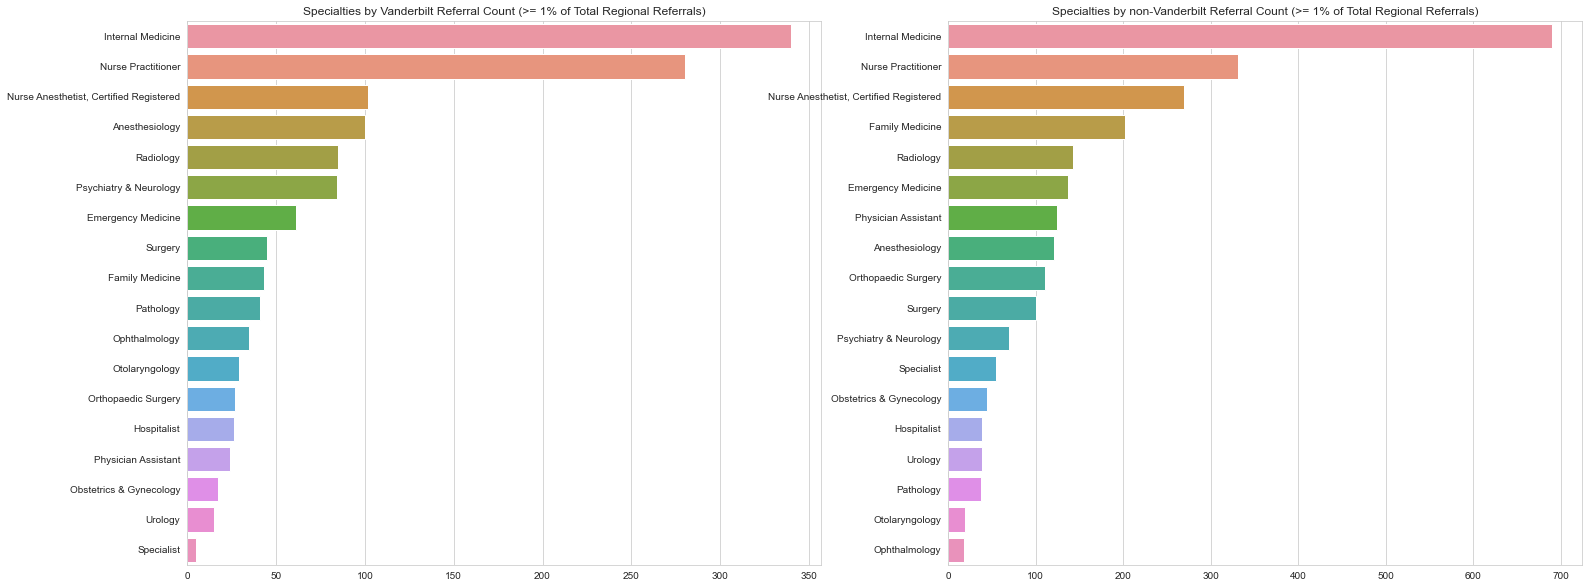

In [44]:
sns.set_style('whitegrid')
sns.set_palette('bright')

fig, (ax0, ax1) = plt.subplots(1,2, figsize = (25, 10))

g0 = sns.barplot(y = 'Classification', x = 'vcount', ax = ax0,
                data = communities_compare_count.sort_values('vcount', ascending = False)
                )

g1 = sns.barplot(y = 'Classification', x = 'nVcount', ax = ax1, 
                data = communities_compare_count.sort_values('nVcount', ascending = False)
                )

ax0.set_title('Specialties by Vanderbilt Referral Count (>= 1% of Total Regional Referrals)')
ax0.set(xlabel = '', ylabel = '')

ax1.set_title('Specialties by non-Vanderbilt Referral Count (>= 1% of Total Regional Referrals)')
ax1.set(xlabel = '', ylabel = '')

fig.savefig('vandy_vs_nvandy_referral_count.png', pdi = 250)

In [45]:
communities_count = communities_count.astype({'communityId' : 'int'})

In [46]:
communities_nVandy = communities_nVandy.merge(communities_count, how = 'left', on = 'communityId')

In [47]:
communities_nVandy.astype({'entity_type_code' : 'int'})

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name,count
0,1003013947,4234,Orthopaedic Surgery,1,None,OTTO,ROBERT,898
1,1003031261,4234,Orthopaedic Surgery,1,None,RUBRIGHT,JAMES,898
2,1003071333,2542,Family Medicine,1,None,NATHAN,JAYASHREE,40
3,1003075862,2802,Family Medicine,1,None,ANDERSON,AKASHIA,284
4,1003090424,4234,Thoracic Surgery (Cardiothoracic Vascular Surg...,1,None,BAXTER,TAMMY,898
...,...,...,...,...,...,...,...,...
2733,1992956114,4245,Physician Assistant,1,None,PERRY,AMANDA,378
2734,1992960298,4239,Radiology,1,None,STARACE,GABRIEL,604
2735,1992961841,4238,Nurse Practitioner,1,None,ANGLUM,ABIGAIL,184
2736,1992978845,4234,Family Medicine,1,None,CHILDS,ADAM,898


In [48]:
communities_nVandy[communities_nVandy['entity_type_code'] == 2].sort_values('count', ascending = False)

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name,count
68,1023055126,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None,898
1997,1720032345,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None,898
2688,1982650024,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None,898
2556,1932146032,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None,898
2723,1992776405,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None,898
838,1295780476,4234,General Acute Care Hospital,2.0,HTI MEMORIAL HOSPITAL CORPORATION,None,None,898
740,1265487193,4234,General Acute Care Hospital,2.0,"HCA HEALTH SERVICES OF TENNESSEE, INC.",None,None,898
1749,1629025648,4239,General Acute Care Hospital,2.0,SAINT THOMAS WEST HOSPITAL,None,None,604
2174,1780778969,4239,General Acute Care Hospital,2.0,SAINT THOMAS WEST HOSPITAL,None,None,604
1181,1417938846,4245,General Acute Care Hospital,2.0,"MACON COUNTY GENERAL HOSPITAL, INC.",None,None,378


In [49]:
communities_nVandy[communities_nVandy['communityId'] == 4245].sort_values('Classification')

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name,count
1153,1407841430,4245,Allergy & Immunology,1.0,None,OVERHOLT,JOHN,378
1924,1699062364,4245,Anesthesiology,1.0,None,WALKER,JEREMY,378
2337,1841581410,4245,Anesthesiology,1.0,None,TAMEZ,DANIEL,378
1015,1366485328,4245,Anesthesiology,1.0,None,DICKERSON,STEVEN,378
336,1124020011,4245,Anesthesiology,1.0,None,KROLL,PETER,378
1451,1518988369,4245,Anesthesiology,1.0,None,TAYLOR,ROBIN,378
1523,1548302789,4245,Anesthesiology,1.0,None,HOMOLYA,KENNETH,378
352,1124175914,4245,Anesthesiology,1.0,None,MILLER,ANDREW,378
1216,1427098912,4245,Anesthesiology,1.0,None,ELALAYLI,HANI GALAL,378
2494,1902840044,4245,Anesthesiology,1.0,None,PEOPLES,MELISSA,378


In [50]:
communities_4245 = communities_nVandy[communities_nVandy['communityId'] == 4245].sort_values('Classification')
communities_4245[communities_4245['entity_type_code'] == 1]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name,count
1153,1407841430,4245,Allergy & Immunology,1.0,None,OVERHOLT,JOHN,378
1924,1699062364,4245,Anesthesiology,1.0,None,WALKER,JEREMY,378
2337,1841581410,4245,Anesthesiology,1.0,None,TAMEZ,DANIEL,378
1015,1366485328,4245,Anesthesiology,1.0,None,DICKERSON,STEVEN,378
336,1124020011,4245,Anesthesiology,1.0,None,KROLL,PETER,378
1451,1518988369,4245,Anesthesiology,1.0,None,TAYLOR,ROBIN,378
1523,1548302789,4245,Anesthesiology,1.0,None,HOMOLYA,KENNETH,378
352,1124175914,4245,Anesthesiology,1.0,None,MILLER,ANDREW,378
1216,1427098912,4245,Anesthesiology,1.0,None,ELALAYLI,HANI GALAL,378
2494,1902840044,4245,Anesthesiology,1.0,None,PEOPLES,MELISSA,378


In [51]:
communities_4245[communities_4245['entity_type_code'] == 2]

,npi,communityId,Classification,entity_type_code,provider_organization_name,provider_last_name,provider_first_name,count
1181,1417938846,4245,General Acute Care Hospital,2.0,"MACON COUNTY GENERAL HOSPITAL, INC.",None,None,378
1273,1447571658,4245,General Acute Care Hospital,2.0,SUMNER REGIONAL MEDICAL CENTER LLC,None,None,378
1860,1669567897,4245,General Acute Care Hospital,2.0,NORTHCREST MEDICAL CENTER,None,None,378
1333,1467763458,4245,General Acute Care Hospital,2.0,TROUSDALE MEDICAL CENTER LLC,None,None,378
1490,1538114434,4245,General Acute Care Hospital,2.0,HENDERSONVILLE HOSPITAL CORPORATION,None,None,378


In [54]:
communities_4245_count = communities_4245.groupby('Classification')['npi'].count()

In [55]:
communities_4245_count = communities_4245_count.reset_index()

In [57]:
communities_4245_count = communities_4245_count.rename(columns = {'npi' : 'count'})

In [60]:
communities_4245_count[communities_4245_count['count'] > 2].sort_values('count', ascending = False)

,Classification,count
9,Internal Medicine,69
11,Nurse Practitioner,60
5,Family Medicine,53
10,"Nurse Anesthetist, Certified Registered",33
19,Physician Assistant,29
4,Emergency Medicine,28
22,Radiology,13
1,Anesthesiology,12
13,Orthopaedic Surgery,12
25,Specialist,10
